In [5]:
from numpy import sqrt, cos, tan, sin, radians, degrees, pi, arctan2
import matplotlib.patches as mpatches
from scipy.optimize import fsolve
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


In [6]:
g = 9.81
rim_width = 1.2192 #4ft
rim_height = 2.64
cargo_radius = 0.2413/2
drag_coeff = 0.23 #https://www.chiefdelphi.com/t/galactech-4926-build-blog-2022/398705/5
cargo_mass = 0.27
air_density = 1.225

cargo_area = pi * cargo_radius**2


def flight_model(t, s):
    x, vx, y, vy = s
    dx = vx
    dy = vy

    v_squared = vx**2 + vy**2
    v = sqrt(v_squared)

    sin_component = vy/v
    cos_component = vx/v

    Fd = 0.5 * air_density * cargo_area * drag_coeff * v_squared

    Fx = -Fd*cos_component
    Fy = -Fd*sin_component - g

    dvx = Fx / cargo_mass
    dvy = Fy / cargo_mass
    return [dx, dvx, dy, dvy]

def hit_ground(t, s):
    x, vx, y, vy = s
    return y
hit_ground.terminal = True

def hit_rim(t, s):
    x, vx, y, vy = s
    dist_to_rim = min(x - -rim_width/2, -(y - rim_height)) #positive if cargo is down and to the right of closest rim
    return dist_to_rim + cargo_radius
hit_rim.terminal = True

def passed_rim(t, s):
    x, vx, y, vy = s
    return x - rim_width/2
passed_rim.terminal = True

undershot


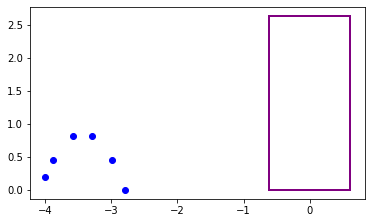

result: -1


In [35]:
def try_shot(s0, doShow):
    t_span = (0, 5.0)
    solution = solve_ivp(flight_model, t_span, s0, events=[hit_ground, hit_rim, passed_rim], max_step=0.1)

    result = 0 #default is success
    if(solution.y[0][-1] < -rim_width/2):
        result = -1 #undershot
    elif(solution.y[0][-1] > rim_width/2 - cargo_radius):
        result = 1 #overshot

    if doShow:

        if result == -1: print("undershot")
        elif result == 0: print("success")
        elif result == 1: print("overshot")

        plt.plot(solution.y[0, :], solution.y[2, :], 'bo')

        left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)
        rect=mpatches.Rectangle((left,bottom), width, height, fill=False, color="purple", linewidth=2)
        plt.gca().add_patch(rect)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    return result

#s0 is [xpos, xvel, ypos, yvel]
print("result:", try_shot(s0=[-4, 3, 0.2, 7], doShow=True))


In [17]:
from math import pi
x_range = np.arange(-6, -1, 0.1)
y_range = np.arange(0.2, 1.4, 0.1)

ang_range = np.linspace(radians(5), radians(85), num=10)
speed_range = np.linspace(10, 25, num=10)

everything = np.zeros((x_range.size, y_range.size, ang_range.size, speed_range.size))
print("everything shape", everything.shape)
print("everything cells", everything.size)

heatmap = np.zeros((x_range.size, y_range.size, 3))
vel_combos = ang_range.size * speed_range.size
print("vel combos", vel_combos)

everything shape (50, 12, 10, 10)
everything cells 60000
vel combos 100


In [18]:
from math import sin, cos

for xi in range(x_range.size):
    for yi in range(y_range.size):

        num_zeros = 0

        for angi in range(ang_range.size):
            for speedi in range(speed_range.size):

                vx = speed_range[speedi] * cos(ang_range[angi])
                vy = speed_range[speedi] * sin(ang_range[angi])

                cell = try_shot(s0=[x_range[xi], vx, y_range[yi], vy], doShow=False)
                everything[xi][yi][angi][speedi] = cell
                if cell == 0:
                    num_zeros += 1

        heatmap[xi, yi, 0] = num_zeros / vel_combos #overall probability of hitting target 


    print(f'x pos index {xi} of {x_range.size}')

print("done")

x pos index 0 of 50
x pos index 1 of 50
x pos index 2 of 50
x pos index 3 of 50
x pos index 4 of 50
x pos index 5 of 50
x pos index 6 of 50
x pos index 7 of 50
x pos index 8 of 50
x pos index 9 of 50
x pos index 10 of 50
x pos index 11 of 50
x pos index 12 of 50
x pos index 13 of 50
x pos index 14 of 50
x pos index 15 of 50
x pos index 16 of 50
x pos index 17 of 50
x pos index 18 of 50
x pos index 19 of 50
x pos index 20 of 50
x pos index 21 of 50
x pos index 22 of 50
x pos index 23 of 50
x pos index 24 of 50
x pos index 25 of 50
x pos index 26 of 50
x pos index 27 of 50
x pos index 28 of 50
x pos index 29 of 50
x pos index 30 of 50
x pos index 31 of 50
x pos index 32 of 50
x pos index 33 of 50
x pos index 34 of 50
x pos index 35 of 50
x pos index 36 of 50
x pos index 37 of 50
x pos index 38 of 50
x pos index 39 of 50
x pos index 40 of 50
x pos index 41 of 50
x pos index 42 of 50
x pos index 43 of 50
x pos index 44 of 50
x pos index 45 of 50
x pos index 46 of 50
x pos index 47 of 50
x 

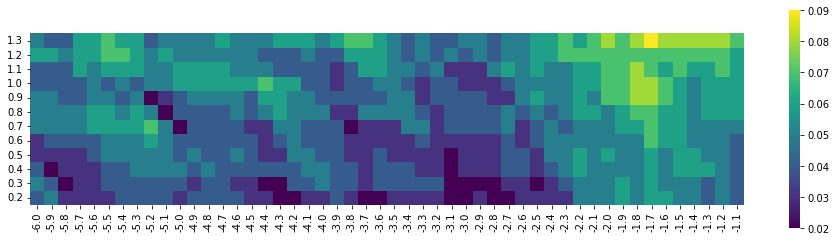

In [19]:
import seaborn as sns

overall_prob = heatmap[:, :, 0]
overall_prob = np.swapaxes(overall_prob, 0, 1)

xlabels = np.round(x_range, 2)
ylabels = np.round(y_range, 2)

plt.figure(figsize = (16, 4))

ax = sns.heatmap(overall_prob, xticklabels=xlabels, yticklabels=ylabels, cmap='viridis', square=True)
ax.invert_yaxis()


# left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)

# ax.add_patch(mpatches.Rectangle((left, bottom), width, height, edgecolor='red', fill=False, lw=1))


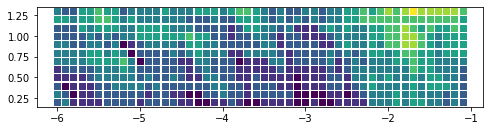

In [20]:
plt.figure(figsize = (8, 8))
X, Y = np.meshgrid(xlabels, ylabels)
plt.scatter(X, Y, c=overall_prob, marker='s')
plt.gca().set_aspect('equal', adjustable='box')


success


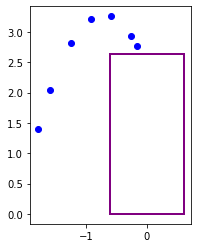

0

In [39]:
try_shot(s0=[-1.8, 3.5, 1.4, 12], doShow=1)

In [40]:
def refine_ang_speed_space(x, y, ang_range_dense, speed_range_dense):

    # ang_range_dense = np.linspace(min(ang_range), max(ang_range), ang_divs)
    # speed_range_dense = np.linspace(min(speed_range), max(speed_range), speed_divs)
    
    ang_speed_space = np.zeros((ang_range_dense.size, speed_range_dense.size))

    num_zeros = 0

    for angi in range(ang_range_dense.size):
        for speedi in range(speed_range_dense.size):

            vx = speed_range_dense[speedi] * cos(ang_range_dense[angi])
            vy = speed_range_dense[speedi] * sin(ang_range_dense[angi])

            cell = try_shot(s0=[x, vx, y, vy], doShow=False)

            if cell == 0: num_zeros += 1

            ang_speed_space[angi][speedi] = cell

    print("at x", x, "and y", y, "gets", num_zeros, "hits")
    # print(ang_speed_space)

    plt.figure(figsize = (8, 8))
    X, Y = np.meshgrid(ang_range_dense, speed_range_dense)
    plt.scatter(X, Y, c=ang_speed_space.T, marker='s')
    plt.xlabel("angle")
    plt.ylabel("speed")
    plt.show()



at x -3.2 and y 0.5 gets 210 hits


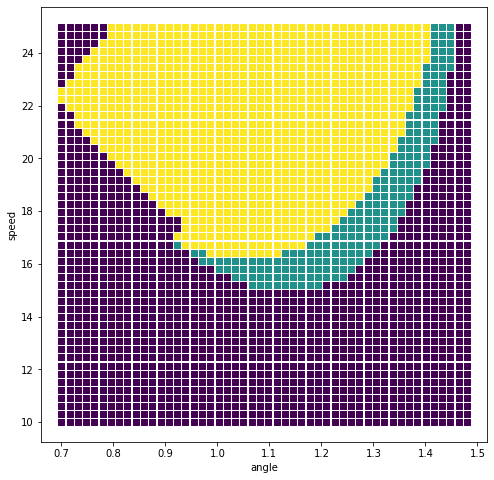

at x -2.2 and y 0.5 gets 207 hits


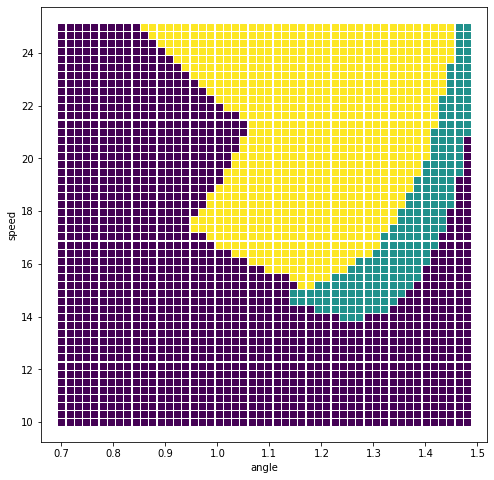

at x -1.2 and y 0.5 gets 104 hits


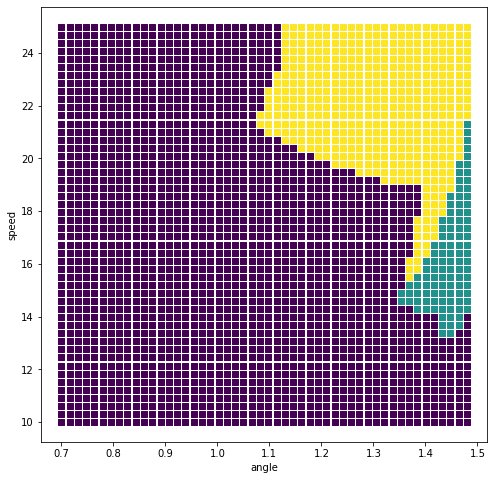

In [41]:
refine_ang_speed_space(-3.2, 0.5, ang_range_dense=np.linspace(0.7, 1.48, 50), speed_range_dense=np.linspace(10, 25, 50))
refine_ang_speed_space(-2.2, 0.5, ang_range_dense=np.linspace(0.7, 1.48, 50), speed_range_dense=np.linspace(10, 25, 50))
refine_ang_speed_space(-1.2, 0.5, ang_range_dense=np.linspace(0.7, 1.48, 50), speed_range_dense=np.linspace(10, 25, 50))

at x -6 and y 0.4 gets 144 hits


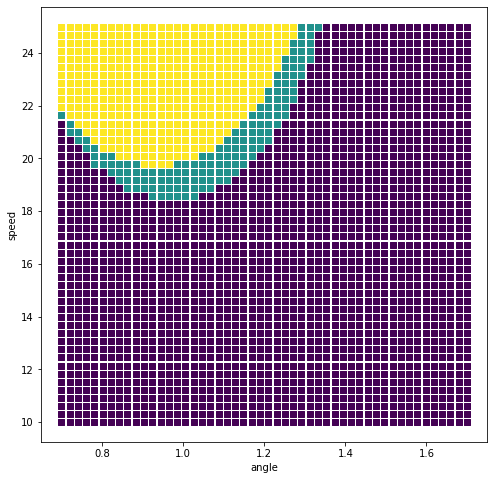

at x -6 and y 0.2 gets 134 hits


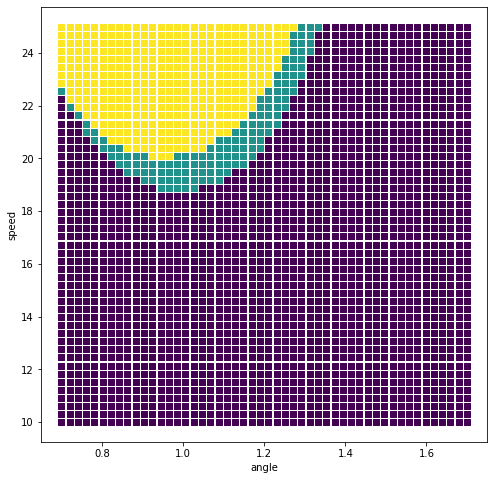

In [24]:
refine_ang_speed_space(-6, 0.4, ang_range_dense=np.linspace(0.7, 1.7, 50), speed_range_dense=np.linspace(10, 25, 50))
refine_ang_speed_space(-6, 0.2, ang_range_dense=np.linspace(0.7, 1.7, 50), speed_range_dense=np.linspace(10, 25, 50))

undershot


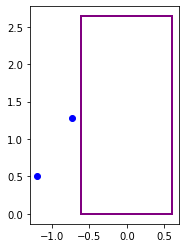

-1

In [28]:
speed = 22
angle = 1.05
try_shot(s0=[-1.2, speed*cos(angle), 0.5, speed*sin(angle)], doShow=True)

speed as a predicted function of angle matches simulation pretty well:
https://www.desmos.com/calculator/yjkeyjtnlf
![speed as a predicted function of angle matches simulation pretty well](desmos.png)
